# Initial Setups

## autoreload

In [1]:
%load_ext autoreload
%autoreload 2

## dir setup

In [2]:
from dotenv import load_dotenv, find_dotenv
import os

this_file_path = os.path.dirname(os.path.abspath("__file__"))
# if script (not notebook)...
# project_dir = os.path.join(os.path.dirname(__file__), os.pardir)

# project directory
project_dir = os.path.join(this_file_path, os.pardir)

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

True

In [3]:
raw_data_dir = os.path.join(project_dir, os.environ.get("RAW_DATA_DIR"))
processed_data_dir = os.path.join(project_dir, os.environ.get("PROCESSED_DATA_DIR"))
interim_data_dir = os.path.join(project_dir, os.environ.get("INTERIM_DATA_DIR"))
wordvecs_data_dir = os.path.join(project_dir, os.environ.get("WORDVECS_DATA_DIR"))
figures_dir = os.path.join(project_dir, os.environ.get("FIGURES_DIR"))
reports_dir = os.path.join(project_dir, os.environ.get("REPORTS_DIR"))
cv_dir = os.path.join(project_dir, os.environ.get("CV_DIR"))
models_dir = os.path.join(project_dir, os.environ.get("MODELS_DIR"))

## imports

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
# import sweetviz as sv
# import utils

In [5]:
pd.set_option('max_rows', 200)
pd.set_option('max_columns', None)

In [6]:
from tqdm import tqdm
tqdm.pandas()

/Users/hitoshinagano/.virtualenvs/tensorflow2/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## project imports

In [7]:
import sys
sys.path.insert(0, '..')

from src.features import *
from src.models import *

### reading item_domain

In [8]:
item_domain_fn = 'item_domain.pkl'
item_domain_fp = os.path.join(processed_data_dir, item_domain_fn)
item_domain = pd.read_pickle(item_domain_fp)

In [9]:
item_domain

,item_id,domain_id
0,111260,MLM-INDIVIDUAL_HOUSES_FOR_SALE
1,871377,MLM-VIDEO_GAMES
2,490232,MLM-SKIRTS
3,1150706,MLM-GRAPHICS_CARDS
4,934912,MLM-NOTEBOOKS
...,...,...
2102272,1099649,MLB-BABY_STROLLERS
2102273,1482187,MLB-KITCHEN_SUPPLIES
2102274,1118904,MLB-SOCKS
2102275,237229,MLB-DISPOSABLE_BABY_DIAPERS


## test_dataset.jl.gz

In [10]:
%%time
test = read_raw_save_processed('test_dataset.jl.gz', 'test_dataset.pkl')

CPU times: user 1.3 s, sys: 596 ms, total: 1.9 s
Wall time: 2.09 s


### submissions check

In [13]:
pred_10_fn = 'pred_7_implicit_search_embs_noviews.csv'
pred_10_fp = os.path.join(reports_dir, pred_10_fn)
pred_10 = pd.read_csv(pred_10_fp, header = None)

pred_10.columns = [str(c) for c in pred_10.columns]

In [16]:
for c in range(10):
    pred_10[str(c) + '_domain'] = pd.merge(pred_10, item_domain, how = 'left', left_on = str(c), right_on = 'item_id')['domain_id']
    pred_10[str(c) + '_MLX'] = pred_10[str(c) + '_domain'].str[:3]

In [17]:
pred_10_domains = pred_10.filter(like = 'MLX').replace({'MLB': 1, 'MLM': 0})

In [18]:
pred_10 = pd.concat([pred_10, pred_10_domains.sum(axis = 1)], axis = 1)

In [19]:
pred_10[pred_10[0].isin(range(1, 10))].sample(10)

,0,1,2,3,4,5,6,7,8,9,0_domain,0_MLX,1_domain,1_MLX,2_domain,2_MLX,3_domain,3_MLX,4_domain,4_MLX,5_domain,5_MLX,6_domain,6_MLX,7_domain,7_MLX,8_domain,8_MLX,9_domain,9_MLX,0
123965,23903,624249,602671,1251230,1076204,184980,1656985,1805356,1471316,763171,MLB-SUPPLEMENTS,MLB,MLM-BEAUTY_AND_PERSONAL_CARE_SUPPLIES,MLM,MLM-CATS_AND_DOGS_FOODS,MLM,MLM-SIM_CARDS,MLM,MLM-VIDEO_GAME_PREPAID_CARDS,MLM,MLB-CELLPHONES,MLB,MLB-SUPPLEMENTS,MLB,MLB-EMERGENCY_LIGHTS,MLB,MLB-CELLPHONES,MLB,MLB-SNEAKERS,MLB,6.0
11923,23903,602671,624249,1076204,1251230,1805356,184980,1656985,2022473,2035282,MLB-SUPPLEMENTS,MLB,MLM-CATS_AND_DOGS_FOODS,MLM,MLM-BEAUTY_AND_PERSONAL_CARE_SUPPLIES,MLM,MLM-VIDEO_GAME_PREPAID_CARDS,MLM,MLM-SIM_CARDS,MLM,MLB-EMERGENCY_LIGHTS,MLB,MLB-CELLPHONES,MLB,MLB-SUPPLEMENTS,MLB,MLB-AUTOMOTIVE_INTERIOR_REARVIEW_MIRRORS,MLB,MLB-CAKES,MLB,6.0
104895,23903,624249,602671,1076204,1251230,184980,1805356,1656985,2022473,763171,MLB-SUPPLEMENTS,MLB,MLM-BEAUTY_AND_PERSONAL_CARE_SUPPLIES,MLM,MLM-CATS_AND_DOGS_FOODS,MLM,MLM-VIDEO_GAME_PREPAID_CARDS,MLM,MLM-SIM_CARDS,MLM,MLB-CELLPHONES,MLB,MLB-EMERGENCY_LIGHTS,MLB,MLB-SUPPLEMENTS,MLB,MLB-AUTOMOTIVE_INTERIOR_REARVIEW_MIRRORS,MLB,MLB-SNEAKERS,MLB,6.0
73947,23903,602671,624249,1076204,1251230,1805356,1656985,184980,344295,2022473,MLB-SUPPLEMENTS,MLB,MLM-CATS_AND_DOGS_FOODS,MLM,MLM-BEAUTY_AND_PERSONAL_CARE_SUPPLIES,MLM,MLM-VIDEO_GAME_PREPAID_CARDS,MLM,MLM-SIM_CARDS,MLM,MLB-EMERGENCY_LIGHTS,MLB,MLB-SUPPLEMENTS,MLB,MLB-CELLPHONES,MLB,MLM-RING_SIZERS,MLM,MLB-AUTOMOTIVE_INTERIOR_REARVIEW_MIRRORS,MLB,5.0
125907,756385,1560533,248087,570711,1413990,1344729,628598,1896467,1095716,556178,MLB-CELLPHONES,MLB,MLB-MALE_UNDERWEAR,MLB,MLB-HARD_DRIVES_AND_SSDS,MLB,MLB-CELLPHONES,MLB,MLB-T_SHIRTS,MLB,MLM-VIDEO_GAMES,MLM,MLB-SUSPENDERS,MLB,MLB-CELLPHONES,MLB,MLM-VIDEO_GAMES,MLM,MLB-HEADPHONES,MLB,8.0
87196,23903,602671,624249,1251230,1076204,184980,1805356,1656985,2022473,344295,MLB-SUPPLEMENTS,MLB,MLM-CATS_AND_DOGS_FOODS,MLM,MLM-BEAUTY_AND_PERSONAL_CARE_SUPPLIES,MLM,MLM-SIM_CARDS,MLM,MLM-VIDEO_GAME_PREPAID_CARDS,MLM,MLB-CELLPHONES,MLB,MLB-EMERGENCY_LIGHTS,MLB,MLB-SUPPLEMENTS,MLB,MLB-AUTOMOTIVE_INTERIOR_REARVIEW_MIRRORS,MLB,MLM-RING_SIZERS,MLM,5.0
105431,23903,602671,624249,1076204,1805356,1656985,1251230,184980,2022473,344295,MLB-SUPPLEMENTS,MLB,MLM-CATS_AND_DOGS_FOODS,MLM,MLM-BEAUTY_AND_PERSONAL_CARE_SUPPLIES,MLM,MLM-VIDEO_GAME_PREPAID_CARDS,MLM,MLB-EMERGENCY_LIGHTS,MLB,MLB-SUPPLEMENTS,MLB,MLM-SIM_CARDS,MLM,MLB-CELLPHONES,MLB,MLB-AUTOMOTIVE_INTERIOR_REARVIEW_MIRRORS,MLB,MLM-RING_SIZERS,MLM,5.0
14596,1076204,1251230,602671,624249,23903,184980,1528034,1107090,1656985,1427522,MLM-VIDEO_GAME_PREPAID_CARDS,MLM,MLM-SIM_CARDS,MLM,MLM-CATS_AND_DOGS_FOODS,MLM,MLM-BEAUTY_AND_PERSONAL_CARE_SUPPLIES,MLM,MLB-SUPPLEMENTS,MLB,MLB-CELLPHONES,MLB,MLB-SNEAKERS,MLB,MLM-CAMERA_TRIPODS,MLM,MLB-SUPPLEMENTS,MLB,MLM-LAPTOP_KEYBOARDS,MLM,4.0
104173,1251230,23903,602671,624249,1805356,1076204,184980,170434,1471316,344295,MLM-SIM_CARDS,MLM,MLB-SUPPLEMENTS,MLB,MLM-CATS_AND_DOGS_FOODS,MLM,MLM-BEAUTY_AND_PERSONAL_CARE_SUPPLIES,MLM,MLB-EMERGENCY_LIGHTS,MLB,MLM-VIDEO_GAME_PREPAID_CARDS,MLM,MLB-CELLPHONES,MLB,MLB-BOOKS,MLB,MLB-CELLPHONES,MLB,MLM-RING_SIZERS,MLM,5.0
43637,23903,602671,624249,1076204,1251230,184980,1656985,1805356,2022473,1471316,MLB-SUPPLEMENTS,MLB,MLM-CATS_AND_DOGS_FOODS,MLM,MLM-BEAUTY_AND_PERSONAL_CARE_SUPPLIES,MLM,MLM-VIDEO_GAME_PREPAID_CARDS,MLM,MLM-SIM_CARDS,MLM,MLB-CELLPHONES,MLB,MLB-SUPPLEMENTS,MLB,MLB-EMERGENCY_LIGHTS,MLB,MLB-AUTOMOTIVE_INTERIOR_REARVIEW_MIRRORS,MLB,MLB-CELLPHONES,MLB,6.0


In [20]:
pred_10.rename(columns = {0: 'MLX_sum'}, inplace = True)

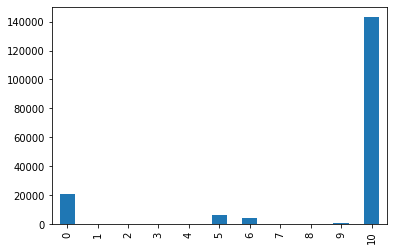

In [22]:
pred_10.MLX_sum.value_counts().reindex(range(11)).plot(kind = 'bar');

In [23]:
pred_10_domains = pred_10.filter(like = 'domain')

In [24]:
pred_10_domains = pred_10_domains.fillna('NONE')

In [25]:
pred_10['unique_domains'] = pred_10_domains.apply(lambda x: np.unique(x, return_counts = True), axis = 1)

In [26]:
pred_10['len_unique_domains'] = pred_10.unique_domains.str[0].str.len()

In [27]:
pred_10['len_domain_mode_freq'] = pred_10.unique_domains.str[1].apply(max)

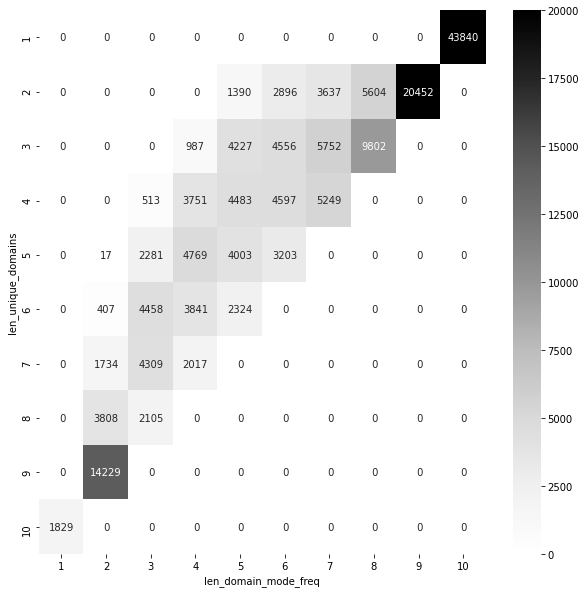

In [28]:
plt.figure(figsize = (10, 10))
sns.heatmap(pd.crosstab(index = pred_10.len_unique_domains, columns = pred_10.len_domain_mode_freq), cmap = 'Greys', vmax = 20000, annot = True, fmt = '2');